In [83]:
from sklearn import datasets, linear_model
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy import stats

In [3]:
target_url = 'http://users.stat.ufl.edu/~winner/data/airq402.dat'
response = requests.get(target_url)
data_dat = response.text
data_list = data_dat.splitlines() 
data_content = [e.split() for e in data_list]
print(data_content)
#Column names for the data are:
cols = ['City1', 'City2', 'Average Fare', 'Distance', 'Average weekly passengers',
                   'market leading airline', 'market share', 'Average fare', 'Low price airline',
                   'market share', 'price']



[['CAK', 'ATL', '114.47', '528', '424.56', 'FL', '70.19', '111.03', 'FL', '70.19', '111.03'], ['CAK', 'MCO', '122.47', '860', '276.84', 'FL', '75.10', '123.09', 'DL', '17.23', '118.94'], ['ALB', 'ATL', '214.42', '852', '215.76', 'DL', '78.89', '223.98', 'CO', '2.77', '167.12'], ['ALB', 'BWI', '69.40', '288', '606.84', 'WN', '96.97', '68.86', 'WN', '96.97', '68.86'], ['ALB', 'ORD', '158.13', '723', '313.04', 'UA', '39.79', '161.36', 'WN', '15.34', '145.42'], ['ALB', 'FLL', '135.17', '1204', '199.02', 'WN', '40.68', '137.97', 'DL', '17.09', '127.69'], ['ALB', 'LAS', '152.85', '2237', '237.17', 'WN', '59.94', '148.59', 'WN', '59.94', '148.59'], ['ALB', 'LAX', '190.73', '2467', '191.95', 'DL', '17.89', '205.06', 'US', '16.59', '174.00'], ['ALB', 'MCO', '129.35', '1073', '550.54', 'WN', '76.84', '127.69', 'WN', '76.84', '127.69'], ['ALB', 'TPA', '134.17', '1130', '202.93', 'US', '35.40', '132.91', 'DL', '26.40', '124.78'], ['ABQ', 'ATL', '212.49', '1269', '198.80', 'DL', '68.39', '226.79', 

In [4]:
df = pd.DataFrame(data_content,columns = cols)
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [5]:
df.shape

(1000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   City1                      1000 non-null   object
 1   City2                      1000 non-null   object
 2   Average Fare               1000 non-null   object
 3   Distance                   1000 non-null   object
 4   Average weekly passengers  1000 non-null   object
 5   market leading airline     1000 non-null   object
 6   market share               1000 non-null   object
 7   Average fare               1000 non-null   object
 8   Low price airline          1000 non-null   object
 9   market share               1000 non-null   object
 10  price                      1000 non-null   object
dtypes: object(11)
memory usage: 86.1+ KB


In [7]:
df.columns = df.columns.str.replace(' ','_')

In [8]:
df

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,73.44


In [9]:
col_names = df.columns.values
col_names[9] = 'market_share_1'
df.columns = col_names

In [10]:
df

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share_1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,73.44


In [11]:
df = df.drop('Average_fare',axis=1)
df.head()

,City1,City2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Low_price_airline,market_share_1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,WN,15.34,145.42


In [12]:
for i in ['Average_Fare','Distance','Average_weekly_passengers','market_share','market_share_1','price']:
    df[i] = df[i].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   City1                      1000 non-null   object 
 1   City2                      1000 non-null   object 
 2   Average_Fare               1000 non-null   float64
 3   Distance                   1000 non-null   float64
 4   Average_weekly_passengers  1000 non-null   float64
 5   market_leading_airline     1000 non-null   object 
 6   market_share               1000 non-null   float64
 7   Low_price_airline          1000 non-null   object 
 8   market_share_1             1000 non-null   float64
 9   price                      1000 non-null   float64
dtypes: float64(6), object(4)
memory usage: 78.2+ KB


In [14]:
num_data = df.select_dtypes(include=np.number)
cat_data = df.select_dtypes(exclude=np.number)
num_data.head()

,Average_Fare,Distance,Average_weekly_passengers,market_share,market_share_1,price
0,114.47,528.0,424.56,70.19,70.19,111.03
1,122.47,860.0,276.84,75.10,17.23,118.94
2,214.42,852.0,215.76,78.89,2.77,167.12
3,69.40,288.0,606.84,96.97,96.97,68.86
4,158.13,723.0,313.04,39.79,15.34,145.42


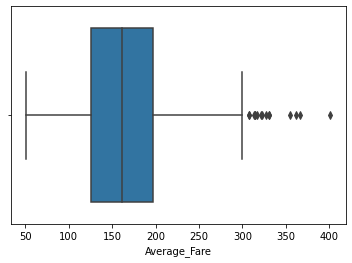

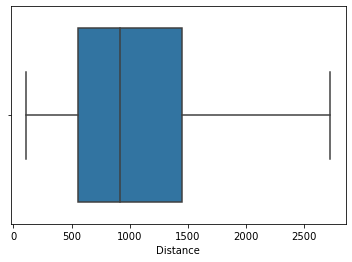

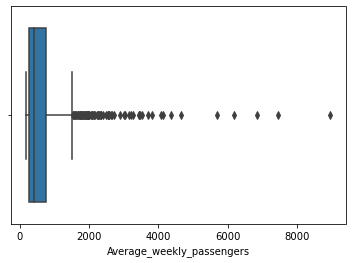

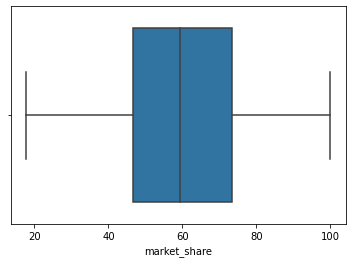

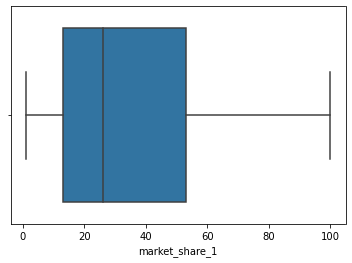

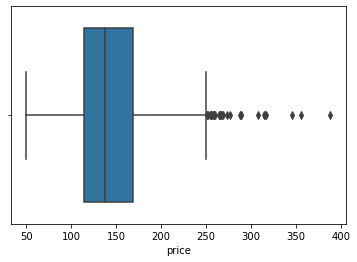

In [15]:
for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.show()

<ipython-input-16-394cc8b9ec35>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.9))
<ipython-input-16-394cc8b9ec35>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))


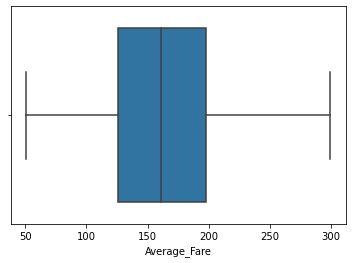

<ipython-input-16-394cc8b9ec35>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.9))
<ipython-input-16-394cc8b9ec35>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))


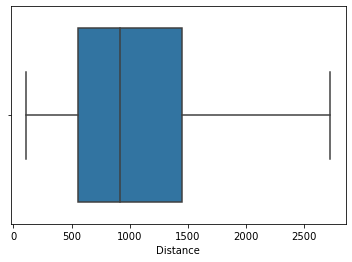

<ipython-input-16-394cc8b9ec35>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.9))
<ipython-input-16-394cc8b9ec35>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))


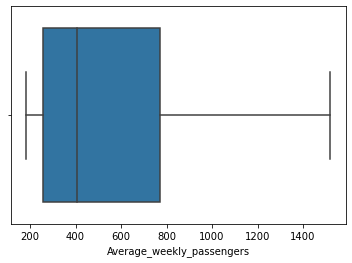

<ipython-input-16-394cc8b9ec35>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.9))
<ipython-input-16-394cc8b9ec35>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))


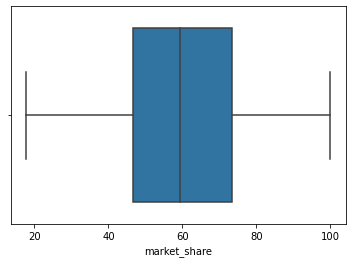

<ipython-input-16-394cc8b9ec35>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.9))
<ipython-input-16-394cc8b9ec35>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))


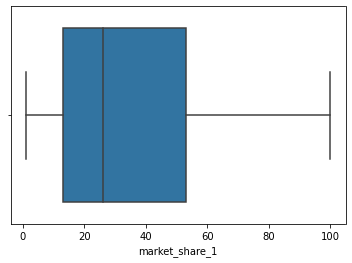

<ipython-input-16-394cc8b9ec35>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.9))
<ipython-input-16-394cc8b9ec35>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))


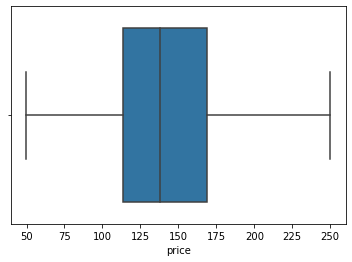

In [16]:
for i in num_data.columns:
    q1 = num_data[i].quantile(0.25)
    q3 = num_data[i].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.9))
    num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))
    sns.boxplot(num_data[i])
    plt.show()

In [18]:
cat_data

,City1,City2,market_leading_airline,Low_price_airline
0,CAK,ATL,FL,FL
1,CAK,MCO,FL,DL
2,ALB,ATL,DL,CO
3,ALB,BWI,WN,WN
4,ALB,ORD,UA,WN
...,...,...,...,...
995,SYR,TPA,US,DL
996,TLH,TPA,FL,FL
997,TPA,IAD,US,DL
998,TPA,PBI,WN,WN


In [20]:
mla_dum = pd.get_dummies(cat_data['market_leading_airline'],prefix='MLA',drop_first=True)
lpa_dum = pd.get_dummies(cat_data['Low_price_airline'],prefix = 'LPA',drop_first=True)

In [21]:
data = pd.concat((num_data,mla_dum,lpa_dum),axis=1)
data.head()

,Average_Fare,Distance,Average_weekly_passengers,market_share,market_share_1,price,MLA_AS,MLA_B6,MLA_CO,MLA_DL,...,LPA_G4,LPA_HP,LPA_NK,LPA_NW,LPA_SY,LPA_TZ,LPA_UA,LPA_US,LPA_WN,LPA_YX
0,114.47,528.0,424.56,70.19,70.19,111.03,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860.0,276.84,75.10,17.23,118.94,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852.0,215.76,78.89,2.77,167.12,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288.0,606.84,96.97,96.97,68.86,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723.0,313.04,39.79,15.34,145.42,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
inp = data.drop('price',axis=1)
out = data['price']

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()
inp_sc = sc.fit_transform(inp)
inp_sc = pd.DataFrame(inp_sc,columns=inp.columns)

In [26]:
from scipy import stats
box_out,lam = stats.boxcox(out)

In [27]:
inpc = sm.add_constant(inp_sc)
ols = sm.OLS(box_out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     126.2
Date:                Wed, 07 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:57:20   Log-Likelihood:                -2404.8
No. Observations:                1000   AIC:                             4886.
Df Residuals:                     962   BIC:                             5072.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        32.9916      0.086    381.804      0.000      32.822      33.161
Average_Fare                  5.2606      0.150     35.090      0.000       4.966       5.555
Distance                      0.5877      0.131      4.470      0.000       0.330       0.846
Average_weekly_passengers    -0.3757      0.097     -3.890      0.000      -0.565      -0.186
market_share                 -0.8917      0.112     -7.990      0.000      -1.111      -0.673
market_share_1                1.2658      0.114     11.097      0.000       1.042       1.490
MLA_AS                       -0.0498      0.120     -0.415      0.679      -0.285       0.186
MLA_B6                        0.0503      0.137      0.366      0.715      -0.219       0.320
MLA_CO                        0.0834      0.105      0.792      0.429      -0.123       0.290
MLA_DL                       -0.3860      0.125     -3.095      0.002      -0.631      -0.141
MLA_F9                       -0.1022      0.090     -1.137      0.256      -0.279       0.074
MLA_FL                       -0.3022      0.105     -2.892      0.004      -0.507      -0.097
MLA_G4                       -0.1080      0.044     -2.479      0.013      -0.194      -0.023
MLA_HP                       -0.1924      0.099     -1.939      0.053      -0.387       0.002
MLA_NK                       -0.0732      0.129     -0.568      0.570      -0.326       0.180
MLA_NW                       -0.5136      0.115     -4.475      0.000      -0.739      -0.288
MLA_TZ                       -0.0170      0.098     -0.174      0.862      -0.209       0.175
MLA_UA                       -0.2546      0.116     -2.189      0.029      -0.483      -0.026
MLA_US                        0.0537      0.111      0.484      0.628      -0.164       0.271
MLA_WN                       -0.4005      0.159     -2.524      0.012      -0.712      -0.089
MLA_YX                       -0.1105      0.102     -1.086      0.278      -0.310       0.089
LPA_AQ                       -0.1335      0.089     -1.504      0.133      -0.308       0.041
LPA_AS                       -0.2320      0.117     -1.985      0.047      -0.461      -0.003
LPA_AX                       -0.1146      0.088     -1.301      0.194      -0.287       0.058
LPA_B6                       -0.5543      0.136     -4.075      0.000      -0.821      -0.287
LPA_CO                       -0.4541      0.100     -4.544      0.000      -0.650      -0.258
LPA_DL                       -0.4103      0.121     -3.404      0.001      -0.647      -0.174
LPA_F9                       -0.1888      0.104     -1.815      0.070      -0.393       0.015
LPA_FL                       -0.2672      0.117     -2.277      0.023      -0.498      -0.037
LPA_G4                       -0.1080      0.044     -2.479      0.013      

In [45]:
lr = LinearRegression()
back = sfs(estimator=lr,k_features='best',forward=False,scoring = 'neg_mean_squared_error')
back_mod = back.fit(inp_sc,box_out)
feat_back = back_mod.k_feature_names_
feat_back = list(feat_back)

In [46]:
lr = LinearRegression()
forward = sfs(estimator=lr,k_features=8,forward=True,scoring='neg_mean_squared_error')
sfs_forward = forward.fit(inp_sc,box_out)
feat_forw = sfs_forward.k_feature_names_
feat_forw = list(feat_forw)

In [36]:
lr = LinearRegression()
rfe = RFECV(estimator=lr)
rfe_mod = rfe.fit(inp_sc,box_out)
rfe_mod.ranking_

array([ 1,  1,  1,  1,  1, 29, 28, 26,  2, 23,  3, 17, 16, 24,  1, 30,  6,
       27,  5, 21, 19, 14, 22,  1,  4, 12, 18, 15, 13, 25, 10,  8,  9,  1,
       11,  7,  1, 20])

In [37]:
rank = pd.DataFrame()
rank['Rank'] = rfe_mod.ranking_
rank['Features'] = inp_sc.columns
rank

,Rank,Features
0,1,Average_Fare
1,1,Distance
2,1,Average_weekly_passengers
3,1,market_share
4,1,market_share_1
5,29,MLA_AS
6,28,MLA_B6
7,26,MLA_CO
8,2,MLA_DL
9,23,MLA_F9


In [42]:
feat_rfe = rank[rank['Rank']==1]['Features']
list(feat_rfe)

['Average_Fare',
 'Distance',
 'Average_weekly_passengers',
 'market_share',
 'market_share_1',
 'MLA_NW',
 'LPA_B6',
 'LPA_TZ',
 'LPA_WN']

In [52]:
xtrain,xtest,ytrain,ytest = train_test_split(inp_sc,box_out,test_size = 0.3,random_state = 48)

In [ ]:
lr = LinearRegression()
lr_mod = lr.fit(xtrain[feat_back],ytrain)
ypred = lr.predict(xtest[feat_back])
r2 = r2_score(ytest,ypred)
rmse = np.sqrt(mean_squared_error(ytest,ypred))
res_back = [r2,rmse]
res_back

In [54]:
lr = LinearRegression()
back_mod = lr.fit(xtrain[feat_back],ytrain)
ypred = back_mod.predict(xtest[feat_back])
r2 = r2_score(ytest,ypred)
rmse = np.sqrt(mean_squared_error(ytest,ypred))
res_back = [r2,rmse]
res_back

[0.8252888392911154, 2.7355143497384438]

In [58]:
lr = LinearRegression()
forw_mod = lr.fit(xtrain[feat_forw],ytrain)
ypred = forw_mod.predict(xtest[feat_forw])
r2 = r2_score(ytest,ypred)
rmse = np.sqrt(mean_squared_error(ytest,ypred))
res_back = [r2,rmse]
res_back

[0.8243550808264639, 2.7428147014396833]

In [59]:
lr = LinearRegression()
rfe_mod = lr.fit(xtrain[feat_rfe],ytrain)
ypred = rfe_mod.predict(xtest[feat_rfe])
r2 = r2_score(ytest,ypred)
rmse = np.sqrt(mean_squared_error(ytest,ypred))
res_back = [r2,rmse]
res_back

[0.82532868560584, 2.7352023880386658]

In [62]:
mse = abs(cross_val_score(lr,inp_sc[feat_rfe],box_out,cv=5,scoring='neg_mean_squared_error'))
rmse = np.sqrt(mse)
be = np.mean(rmse)
ve = np.std(rmse)
cva = ve/be
res = [be,ve,cva]
res

[2.8206169066629903, 0.3192387916631735, 0.11318048576857531]

In [85]:
mod_rid = Ridge(alpha=5)
res = cross_val_score(mod_rid,inp_sc[feat_rfe],box_out,cv=3,scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = np.std(rmse)/np.mean(rmse)
res_ridge1 = [be,ve,cve]
res_ridge1

[2.8326899186026253, 0.2329020946334555, 0.08221941028700622]

In [68]:
mod_las = Lasso(alpha=0.001)
res = cross_val_score(mod_las,inp_sc[feat_rfe],box_out,cv=3,scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = np.std(rmse)/np.mean(rmse)
res_lasso1 = [be,ve,cve]
res_lasso1

[2.833664398438731, 0.232079451192009, 0.0819008247130035]

In [72]:
mod_enet = ElasticNet(alpha=0.01)
res = cross_val_score(mod_enet,inp_sc[feat_rfe],box_out,cv=3,scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse)
ve = np.std(rmse)
cve = np.std(rmse)/np.mean(rmse)
res_enet1 = [be,ve,cve]
res_enet1

[2.8326993184821236, 0.2345854882616984, 0.08281340936227531]

In [74]:
scorecard = pd.DataFrame()
scorecard['Ridge'] = res_ridge1
scorecard['Lasso'] = res_lasso1
scorecard['Enet'] = res_enet1
scorecard.index = ['Bias_Error','Variance_Error','CVA']
scorecard

,Ridge,Lasso,Enet
Bias_Error,2.833411,2.833664,2.832699
Variance_Error,0.231900,0.232079,0.234585
CVA,0.081845,0.081901,0.082813


In [76]:
ridge = Ridge()
ridge_mod = ridge.fit(xtrain[feat_rfe],ytrain)
ypred = ridge_mod.predict(xtest[feat_rfe])
r2 = r2_score(ytest,ypred)
rmse = np.sqrt(mean_squared_error(ytest,ypred))
res_rfe_ridge = [r2,rmse]
res_rfe_ridge

[0.8252062019050574, 2.7361612146268044]

In [77]:
ridge_mod.coef_

array([ 5.42747602,  0.61362057, -0.29270928, -0.92340375,  1.29818794,
       -0.55838276, -0.33430185, -0.4653349 , -0.3958785 ])

In [84]:
model = pd.DataFrame()
model['Features'] = list(feat_rfe)
model['Coef'] = ridge_mod.coef_
model

,Features,Coef
0,Average_Fare,5.427476
1,Distance,0.613621
2,Average_weekly_passengers,-0.292709
3,market_share,-0.923404
4,market_share_1,1.298188
5,MLA_NW,-0.558383
6,LPA_B6,-0.334302
7,LPA_TZ,-0.465335
8,LPA_WN,-0.395879
